In [2]:
# NLTK
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [3]:
# sklearn libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [110]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [5]:
# Misc.
import statistics as stat
import pandas as pd
import numpy as np
import string

In [6]:
# global variables
nums = string.digits
punc = string.punctuation

In [7]:
def tokens(filename):
    tmp_str = ''
    
    with open(filename) as f:
        f_in = f.read()
    f.close()
    
    for line in f_in:
        line_str = str(line)
        if line_str in nums or line_str in punc:
            pass
        else:
            tmp_str += line_str
            
    f_prep = tmp_str.replace('\n','. ').replace('  ','')

    f_sent = sent_tokenize(f_prep)
    f_sent = [s for s in f_sent if s != '.']
    
    f_words = word_tokenize(f_prep)
    f_words = [s for s in f_words if s != '.']
    
    return f_sent, f_words  

In [10]:
# Sentences and individual words for each album
aed_sentence, aed_words = tokens('all-eternals-deck.txt')
btc_sentence, btc_words = tokens('beat-the-champ.txt')
heretic_sentence, heretic_words = tokens('heretic-pride.txt')
gl_sentence, gl_words = tokens('get-lonely.txt')
life_sentence, life_words = tokens('tlotwtc.txt')
ty_sentence, ty_words = tokens('transcendental-youth.txt')
sunset_sentence, sunset_words = tokens('sunset-tree.txt')
wsabh_sentence, wsabh_words = tokens('wsabh.txt')
talla_sentence, talla_words = tokens('tallahassee.txt')
ahwt_sentence, ahwt_words = tokens('ahwt.txt')
tcg_sentence, tcg_words = tokens('the-coroners-gambit.txt')
ffg_sentence, ffg_words = tokens('full-force-galesburg.txt')
nfj_sentence, nfj_words = tokens('nothing-for-juice.txt')
sweden_sentence, sweden_words = tokens('sweden.txt')
zopilote_sentence, zopilote_words = tokens('zopilote-machine.txt')
nfj_sentence, nfj_words = tokens('nothing-for-juice.txt')
sweden_sentence, sweden_words = tokens('sweden.txt')
zopilote_sentence, zopilote_words = tokens('zopilote-machine.txt')

In [69]:
album_lines = [
    btc_sentence,
          ty_sentence,
          aed_sentence,
          life_sentence,
          heretic_sentence,
          gl_sentence,
          sunset_sentence,
         wsabh_sentence,
         talla_sentence,
          ahwt_sentence,
          tcg_sentence,
          ffg_sentence,
          nfj_sentence,
          sweden_sentence,
          zopilote_sentence
         ]

In [61]:
album_words = [aed_words,
          btc_words,
          heretic_words,
          gl_words,
          life_words,
          ty_words,
          sunset_words,
         wsabh_words,
         talla_words,
          ahwt_words,
          tcg_words,
          ffg_words,
          nfj_words,
          sweden_words,
          zopilote_words    
]

In [62]:
album_names = [
    'Beat the Champ',
    'Transcendental Youth',
    'All Eternals Deck',
    'The Life of the World to Come',
    'Heretic Pride',
    'Get Lonely',
    'The Sunset Tree',
    'We Shall All Be Healed',
    'Tallahassee',
    'All Hail West Texas',
    "The Coroner's Gambit",
    'Full Force Galesburg',
    'Nothing for Juice',
    'Sweden',
    'Zopilote Machine'
]

In [67]:
album_years = [2015,
          2012,
          2011,
          2009,
          2008,
          2006,
          2005,
          2004,
          2002,
          2002,
          2000,
          1997,
            1996,
            1995,
            1994
         ]

In [66]:
album_labels = ['Merge',
             'Merge',
             'Merge',
             '4AD',
             '4AD',
             '4AD',
             '4AD',
             '4AD',
             '4AD',
             'Emperor Jones',
             'Absolutely Kosher',
             'Emperor Jones',
             'Ajax',
             'Shrimper',
             'Ajax'
            ]

In [65]:
# Hi-fi or lo-fi 
fi = [
    'hi-fi',
    'hi-fi',
    'hi-fi',
    'hi-fi',
    'hi-fi',
    'hi-fi',
    'hi-fi',
    'hi-fi',
    'hi-fi',
    'lo-fi',
    'lo-fi',
    'lo-fi',
    'lo-fi',
    'lo-fi',
    'lo-fi'
]
# Hi-fi or lo-fi represented as 1 or 0, respectively
fi_binary = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [9]:
neg = lambda n : [n[i]['neg'] for i in range(len(n))]
posi = lambda p : [p[i]['pos'] for i in range(len(p))]
neu = lambda ne : [ne[i]['neu'] for i in range(len(ne))]

In [53]:
def get_sentiment(lyrics):
    #neg_avg = []
    #posi_avg = []
    #neu_avg = []
    #neg_med = []
    #posi_med = []
    #neu_med = []
    
    stats_list = []
    
    for l in lyrics:
        # run the sentiment intensity analysis for all items
        tmp_sia = [sia.polarity_scores(y) for y in l]
        # get statistics on mean, median, and standard dev
        # for negative, positive, and neutral sentiments
        tmp_neg_one,tmp_neg_two,tmp_neg_three = get_stats(neg(tmp_sia))
        tmp_pos_one,tmp_pos_two,tmp_pos_three = get_stats(posi(tmp_sia))
        tmp_neu_one,tmp_neu_two,tmp_neu_three = get_stats(neu(tmp_sia))
        
        tmp_list = [tmp_neg_one,tmp_neg_two,tmp_neg_three,
                    tmp_pos_one,tmp_pos_two,tmp_pos_three,
                    tmp_neu_one,tmp_neu_two,tmp_neu_three
                   ]
        
        stats_list.append(tmp_list)
        
    return stats_list
  
    #return neg_avg,neg_med,posi_avg,posi_med,neu_avg,neu_med

In [37]:
def get_stats(info):
    me = stat.mean(info)
    med = stat.median(info)
    sdev = stat.stdev(info)
    return me,med,sdev

In [70]:
album_stats = get_sentiment(album_lines)

In [117]:
album_stats2 = get_sentiment(album_words)

In [75]:
merge_lists = lambda l : [item for sublist in l for item in sublist]

In [115]:
def make_df(stats_list):
    album_list = []
    for i in range(15):
        tmp = [album_names[i],album_labels[i],fi[i],album_years[i]]
        tmp_list = tmp + stats_list[i]
        album_list.append(tmp_list)
    my_df = pd.DataFrame(data = album_list,
                         columns = ['Album.Name',
                                    'Album.Label',
                                    'Hi.Lo.Fi',
                                    'Album.Year',
                                    'Avg.Neg','Med.Neg','StDev.Neg',
             'Avg.Posi','Med.Posi','StDev.Posi',
            'Avg.Neu','Med.Neu','StDev.Neu']
                        )
    return my_df
                                    
                         
    

In [116]:
'''goats_df = make_df([neg_avg,neg_med,posi_avg,posi_med,neu_avg,neu_med,al_years,al_labels,fi],
                   al_names,
                   ['Avg.Neg.Sentiment',
                                'Median.Neg.Sentiment',
                                  'Avg.Posi.Sentiment',
                                'Median.Posi.Sentiment',
                                  'Avg.Neu.Sentiment',
                                'Median.Neu.Sentiment',
                                 'Album.Year',
                                 'Album.Label',
                               'Hi.Lo.Fi']
                  )'''

goats_df = make_df(album_stats)
goats_df

,Album.Name,Album.Label,Hi.Lo.Fi,Album.Year,Avg.Neg,Med.Neg,StDev.Neg,Avg.Posi,Med.Posi,StDev.Posi,Avg.Neu,Med.Neu,StDev.Neu
0,Beat the Champ,Merge,hi-fi,2015,0.094639,0.0,0.195087,0.105624,0.0,0.187506,0.799746,1.0,0.249782
1,Transcendental Youth,Merge,hi-fi,2012,0.076955,0.0,0.153169,0.102189,0.0,0.185459,0.820856,1.0,0.221431
2,All Eternals Deck,Merge,hi-fi,2011,0.057598,0.0,0.138113,0.107645,0.0,0.195561,0.834766,1.0,0.231127
3,The Life of the World to Come,4AD,hi-fi,2009,0.068080,0.0,0.148477,0.070293,0.0,0.146694,0.861630,1.0,0.200291
4,Heretic Pride,4AD,hi-fi,2008,0.068213,0.0,0.150194,0.085722,0.0,0.194051,0.846070,1.0,0.228836
5,Get Lonely,4AD,hi-fi,2006,0.067858,0.0,0.160274,0.062006,0.0,0.133065,0.870140,1.0,0.195595
6,The Sunset Tree,4AD,hi-fi,2005,0.064758,0.0,0.140908,0.071815,0.0,0.155714,0.863433,1.0,0.202443
7,We Shall All Be Healed,4AD,hi-fi,2004,0.042608,0.0,0.118405,0.085246,0.0,0.164869,0.872147,1.0,0.202518
8,Tallahassee,4AD,hi-fi,2002,0.072182,0.0,0.150827,0.109621,0.0,0.197108,0.818205,1.0,0.249920
9,All Hail West Texas,Emperor Jones,lo-fi,2002,0.060354,0.0,0.137448,0.096566,0.0,0.181431,0.843078,1.0,0.218602


# Can album sentiment predict whether an album is hi-fi or lo-fi?

First, I made the above data frame into a numpy array.

In [91]:
goats_np = goats_df.to_numpy()
goats_np

array([['Beat the Champ', 'Merge', 'hi-fi', 2015, 0.09463880597014926,
        0.0, 0.19508660210768783, 0.10562388059701493, 0.0,
        0.1875060925872836, 0.7997462686567164, 1.0, 0.24978176961828136],
       ['Transcendental Youth', 'Merge', 'hi-fi', 2012,
        0.07695492957746479, 0.0, 0.1531688747024278, 0.1021887323943662,
        0.0, 0.1854586493187786, 0.820856338028169, 1.0,
        0.22143126921587222],
       ['All Eternals Deck', 'Merge', 'hi-fi', 2011, 0.05759787234042553,
        0.0, 0.1381132920661759, 0.10764468085106382, 0.0,
        0.19556074131347245, 0.8347659574468085, 1.0,
        0.23112736709321943],
       ['The Life of the World to Come', '4AD', 'hi-fi', 2009,
        0.06807988165680473, 0.0, 0.14847746427726174,
        0.07029289940828402, 0.0, 0.14669401330639378,
        0.8616301775147929, 1.0, 0.20029096618193498],
       ['Heretic Pride', '4AD', 'hi-fi', 2008, 0.06821300448430494, 0.0,
        0.15019438165238255, 0.0857219730941704, 0.0,
     

In [105]:
goats_nums = [g[3:14] for g in goats_np]
goats_nums_df = pd.DataFrame(data=goats_nums)
goats_np_num = goats_nums_df.to_numpy()

In [109]:
x,y = goats_np_num, fi_binary
k_best = SelectKBest(chi2, k=3).fit_transform(x,y)
k_best

array([[2.01500000e+03, 9.46388060e-02, 1.05623881e-01],
       [2.01200000e+03, 7.69549296e-02, 1.02188732e-01],
       [2.01100000e+03, 5.75978723e-02, 1.07644681e-01],
       [2.00900000e+03, 6.80798817e-02, 7.02928994e-02],
       [2.00800000e+03, 6.82130045e-02, 8.57219731e-02],
       [2.00600000e+03, 6.78575581e-02, 6.20058140e-02],
       [2.00500000e+03, 6.47583893e-02, 7.18154362e-02],
       [2.00400000e+03, 4.26077844e-02, 8.52455090e-02],
       [2.00200000e+03, 7.21815857e-02, 1.09621483e-01],
       [2.00200000e+03, 6.03540000e-02, 9.65660000e-02],
       [2.00000000e+03, 5.80327381e-02, 9.17648810e-02],
       [1.99700000e+03, 4.16859756e-02, 6.91006098e-02],
       [1.99600000e+03, 5.31838710e-02, 6.20677419e-02],
       [1.99500000e+03, 6.32297735e-02, 8.48770227e-02],
       [1.99400000e+03, 6.02836676e-02, 8.80859599e-02]])

In [106]:
clf_pipe = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1,gamma='auto'))
new = cross_val_score(clf_pipe,goats_np_num,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (new.mean(), new.std() * 2))

Accuracy: 0.70 (+/- 0.33)


In [108]:
old = cross_val_score(clf_pipe,k_best,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (old.mean(), old.std() * 2))

Accuracy: 0.73 (+/- 0.45)


In [111]:
import matplotlib.pyplot as plt

In [118]:
goats_df2 = make_df(album_stats2)
goats_df2

,Album.Name,Album.Label,Hi.Lo.Fi,Album.Year,Avg.Neg,Med.Neg,StDev.Neg,Avg.Posi,Med.Posi,StDev.Posi,Avg.Neu,Med.Neu,StDev.Neu
0,Beat the Champ,Merge,hi-fi,2015,0.030839,0.0,0.172913,0.053027,0.0,0.224130,0.894321,1.0,0.307484
1,Transcendental Youth,Merge,hi-fi,2012,0.046168,0.0,0.209895,0.052443,0.0,0.222968,0.868669,1.0,0.337838
2,All Eternals Deck,Merge,hi-fi,2011,0.034336,0.0,0.182127,0.040123,0.0,0.196287,0.881944,1.0,0.322736
3,The Life of the World to Come,4AD,hi-fi,2009,0.031533,0.0,0.174792,0.032397,0.0,0.177091,0.873866,1.0,0.332072
4,Heretic Pride,4AD,hi-fi,2008,0.032508,0.0,0.177379,0.037539,0.0,0.190115,0.884288,1.0,0.319941
5,Get Lonely,4AD,hi-fi,2006,0.039385,0.0,0.194556,0.056196,0.0,0.230355,0.869837,1.0,0.336564
6,The Sunset Tree,4AD,hi-fi,2005,0.032474,0.0,0.177297,0.034384,0.0,0.182257,0.892550,1.0,0.309758
7,We Shall All Be Healed,4AD,hi-fi,2004,0.023362,0.0,0.151086,0.044892,0.0,0.207115,0.890060,1.0,0.312887
8,Tallahassee,4AD,hi-fi,2002,0.038814,0.0,0.193193,0.057130,0.0,0.232142,0.855648,1.0,0.351523
9,All Hail West Texas,Emperor Jones,lo-fi,2002,0.030406,0.0,0.171727,0.045752,0.0,0.208976,0.861608,1.0,0.345360


In [119]:
goats_np2 = goats_df2.to_numpy()
goats_np2

array([['Beat the Champ', 'Merge', 'hi-fi', 2015, 0.030838661150808574,
        0.0, 0.1729129334025095, 0.05302745393004889, 0.0,
        0.22413039795649117, 0.8943211733734486, 1.0,
        0.30748393347392494],
       ['Transcendental Youth', 'Merge', 'hi-fi', 2012,
        0.04616763783056925, 0.0, 0.20989505524617377,
        0.05244285073957866, 0.0, 0.22296834264572973, 0.868668758404303,
        1.0, 0.33783798636034007],
       ['All Eternals Deck', 'Merge', 'hi-fi', 2011, 0.03433641975308642,
        0.0, 0.18212695348897945, 0.040123456790123455, 0.0,
        0.19628660007376167, 0.8819444444444444, 1.0, 0.3227361554166535],
       ['The Life of the World to Come', '4AD', 'hi-fi', 2009,
        0.03153347732181425, 0.0, 0.1747922042710844,
        0.032397408207343416, 0.0, 0.17709139779763244,
        0.873866090712743, 1.0, 0.33207194975390886],
       ['Heretic Pride', '4AD', 'hi-fi', 2008, 0.032507739938080496, 0.0,
        0.17737858644391918, 0.03753869969040248, 0.0,

In [120]:
goats_nums2 = [g[3:14] for g in goats_np2]
goats_nums_df2 = pd.DataFrame(data=goats_nums2)
goats_np_num2 = goats_nums_df2.to_numpy()

In [112]:
estimators = [
    ('2 clusters',KMeans(n_clusters=2)),
    ('3 clusters',KMeans(n_clusters=3)),
    ('4 clusters',KMeans(n_clusters=4))
]

In [122]:
x2,y2 = goats_np_num2, fi_binary
k_best2 = SelectKBest(chi2, k=3).fit_transform(x2,y2)
k_best2

array([[2.01500000e+03, 3.08386612e-02, 1.72912933e-01],
       [2.01200000e+03, 4.61676378e-02, 2.09895055e-01],
       [2.01100000e+03, 3.43364198e-02, 1.82126953e-01],
       [2.00900000e+03, 3.15334773e-02, 1.74792204e-01],
       [2.00800000e+03, 3.25077399e-02, 1.77378586e-01],
       [2.00600000e+03, 3.93852065e-02, 1.94556400e-01],
       [2.00500000e+03, 3.24737345e-02, 1.77296933e-01],
       [2.00400000e+03, 2.33623454e-02, 1.51086078e-01],
       [2.00200000e+03, 3.88137811e-02, 1.93193035e-01],
       [2.00200000e+03, 3.04063654e-02, 1.71727105e-01],
       [2.00000000e+03, 3.29067642e-02, 1.78433350e-01],
       [1.99700000e+03, 2.02553941e-02, 1.40903710e-01],
       [1.99600000e+03, 2.42018538e-02, 1.53714967e-01],
       [1.99500000e+03, 2.63435195e-02, 1.60196940e-01],
       [1.99400000e+03, 2.44005048e-02, 1.54321545e-01]])

In [158]:
newt = cross_val_score(clf_pipe,goats_np_num2,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (newt.mean(), newt.std() * 2))

Accuracy: 0.77 (+/- 0.40)


In [159]:
newt = cross_val_score(clf_pipe,k_best2,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (newt.mean(), newt.std() * 2))

Accuracy: 0.83 (+/- 0.42)


0.9375

In [126]:
predict_dict = {}
i = 0
for c,e in estimators:
    predict_dict[c] = e.fit_predict(goats_np_num2)
    i += 1

In [133]:
predict_dict['Actual'] = fi_binary

In [136]:
my_df2 = pd.DataFrame(predict_dict,index=album_names)
my_df2

,2 clusters,3 clusters,4 clusters,Target,Actual
Beat the Champ,1,0,0,1,1
Transcendental Youth,1,0,0,1,1
All Eternals Deck,1,0,0,1,1
The Life of the World to Come,1,0,3,1,1
Heretic Pride,1,0,3,1,1
Get Lonely,1,2,3,1,1
The Sunset Tree,1,2,3,1,1
We Shall All Be Healed,1,2,1,1,1
Tallahassee,0,2,1,1,1
All Hail West Texas,0,2,1,0,0


In [151]:
xxx = my_df2.to_numpy()
xxx

array([[1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [1, 0, 3, 1, 1],
       [1, 0, 3, 1, 1],
       [1, 2, 3, 1, 1],
       [1, 2, 3, 1, 1],
       [1, 2, 1, 1, 1],
       [0, 2, 1, 1, 1],
       [0, 2, 1, 0, 0],
       [0, 2, 1, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0]])

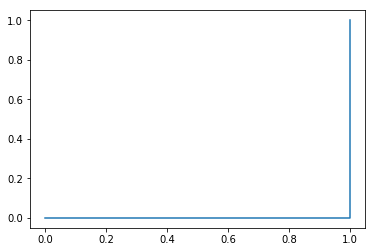

NameError: name 'kmeans' is not defined

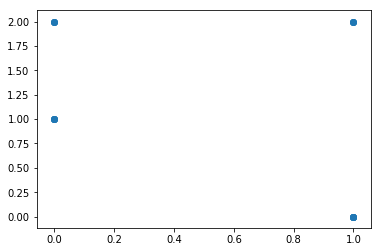

In [163]:
plt.scatter(xxx[:, 0], xxx[:, 1])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Next, I made two lists. One list (the "big" list) has all the information from the data frame, divided per album. The second (the "small" list) has only the sentiment scores.

In [25]:
indiv_list_big = []
indiv_list_small = []
for i in range(len(al_names)):
    tmp_one = [neg_avg[i],neg_med[i],posi_avg[i],posi_med[i],neu_avg[i],neu_med[i],al_years[i]]
    tmp_two = [neg_avg[i],posi_avg[i],neu_avg[i]]
    indiv_list_big.append(tmp_one)
    indiv_list_small.append(tmp_two)

In [26]:
goats_np_big = np.array(indiv_list_big)
goats_np_big

array([[9.46388060e-02, 1.05623881e-01, 7.99746269e-01, 2.01500000e+03],
       [7.69549296e-02, 1.02188732e-01, 8.20856338e-01, 2.01200000e+03],
       [5.75978723e-02, 1.07644681e-01, 8.34765957e-01, 2.01100000e+03],
       [6.80798817e-02, 7.02928994e-02, 8.61630178e-01, 2.00900000e+03],
       [6.82130045e-02, 8.57219731e-02, 8.46069507e-01, 2.00800000e+03],
       [6.78575581e-02, 6.20058140e-02, 8.70139535e-01, 2.00600000e+03],
       [6.47583893e-02, 7.18154362e-02, 8.63432886e-01, 2.00500000e+03],
       [4.26077844e-02, 8.52455090e-02, 8.72146707e-01, 2.00400000e+03],
       [7.21815857e-02, 1.09621483e-01, 8.18204604e-01, 2.00200000e+03],
       [6.03540000e-02, 9.65660000e-02, 8.43078000e-01, 2.00200000e+03],
       [5.80327381e-02, 9.17648810e-02, 8.50208333e-01, 2.00000000e+03],
       [4.16859756e-02, 6.91006098e-02, 8.89213415e-01, 1.99700000e+03],
       [5.31838710e-02, 6.20677419e-02, 8.84735484e-01, 1.99600000e+03],
       [6.32297735e-02, 8.48770227e-02, 8.51896440e

In [24]:
goats_np_small = np.array(indiv_list_small)
goats_np_small

array([[0.05759787, 0.10764468, 0.83476596],
       [0.09463881, 0.10562388, 0.79974627],
       [0.068213  , 0.08572197, 0.84606951],
       [0.06785756, 0.06200581, 0.87013953],
       [0.06807988, 0.0702929 , 0.86163018],
       [0.07695493, 0.10218873, 0.82085634],
       [0.06475839, 0.07181544, 0.86343289],
       [0.04260778, 0.08524551, 0.87214671],
       [0.07218159, 0.10962148, 0.8182046 ],
       [0.060354  , 0.096566  , 0.843078  ],
       [0.05803274, 0.09176488, 0.85020833],
       [0.04168598, 0.06910061, 0.88921341],
       [0.05318387, 0.06206774, 0.88473548],
       [0.06322977, 0.08487702, 0.85189644],
       [0.06028367, 0.08808596, 0.85163324]])

In [27]:
goats_np_big.shape

(15, 4)

In [26]:
goats_np_small.shape

(15, 3)

In addition to the big numpy array and the sentiment-only, small numpy array, I made an array used sklearn's SelectKBest function for feature selection. I chose to use the 3 best features.

In [28]:
x,y = goats_np_big, fi_binary
k_best = SelectKBest(chi2, k=3).fit_transform(x,y)

The best three are *not* the negative, positive, and neutral sentiment polarities. Rather, the best predictors are negative, positive, and year.

In [28]:
k_best

array([[5.75978723e-02, 1.07644681e-01, 2.01500000e+03],
       [9.46388060e-02, 1.05623881e-01, 2.01200000e+03],
       [6.82130045e-02, 8.57219731e-02, 2.01100000e+03],
       [6.78575581e-02, 6.20058140e-02, 2.00900000e+03],
       [6.80798817e-02, 7.02928994e-02, 2.00800000e+03],
       [7.69549296e-02, 1.02188732e-01, 2.00600000e+03],
       [6.47583893e-02, 7.18154362e-02, 2.00500000e+03],
       [4.26077844e-02, 8.52455090e-02, 2.00400000e+03],
       [7.21815857e-02, 1.09621483e-01, 2.00200000e+03],
       [6.03540000e-02, 9.65660000e-02, 2.00200000e+03],
       [5.80327381e-02, 9.17648810e-02, 2.00000000e+03],
       [4.16859756e-02, 6.91006098e-02, 1.99700000e+03],
       [5.31838710e-02, 6.20677419e-02, 1.99600000e+03],
       [6.32297735e-02, 8.48770227e-02, 1.99500000e+03],
       [6.02836676e-02, 8.80859599e-02, 1.99400000e+03]])

### The "big" array and accuracy

In [29]:
clf = svm.SVC(kernel='linear', C=1)
scores_big = cross_val_score(clf, goats_np_big, fi_binary, cv=5)
scores_big                                         

array([0.5, 1. , 1. , 1. , 0.5])

In [30]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_big.mean(), scores_big.std() * 2))

Accuracy: 0.80 (+/- 0.49)


### The "small" array and accuracy

In [31]:
scores_small = cross_val_score(clf,goats_np_small,fi_binary,cv=5)
scores_small

array([0.5       , 0.66666667, 0.66666667, 0.66666667, 0.5       ])

In [32]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_small.mean(), scores_small.std() * 2))

Accuracy: 0.60 (+/- 0.16)


### The k_best array and accuracy

In [33]:
scores_k = cross_val_score(clf,k_best,fi_binary,cv=5)
scores_k

array([0.5, 1. , 1. , 1. , 0.5])

In [34]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_k.mean(), scores_k.std() * 2))

Accuracy: 0.80 (+/- 0.49)


The accuracy, using a linear SVM, is the same for the big array and the k best array. Using only the sentiment scores was not nearly as effective.

### Pipelines and scaling

I had not yet scaled my data, but scaling the big data set raised the accuracy to 88%. Scaling the k_best data set only increased the accuracy to 83%. The small array does not need to be scaled because all values are already on a scale of 0 to 1.

In [31]:
clf_pipe = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1,gamma='auto'))

In [32]:
new = cross_val_score(clf_pipe,goats_np_big,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (new.mean(), new.std() * 2))

Accuracy: 0.82 (+/- 0.31)


In [33]:
newtwo = cross_val_score(clf_pipe,k_best,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (newtwo.mean(), newtwo.std() * 2))

Accuracy: 0.73 (+/- 0.45)


### Moral of (this part of) the Story: SVM model does pretty well 

### Now let's do this with words instead of sentences

In [38]:
lyrics = [aed_words,
          btc_words,
          heretic_words,
          gl_words,
          life_words,
          ty_words,
          sunset_words,
         wsabh_words,
         talla_words,
          ahwt_words,
          tcg_words,
          ffg_words,
          nfj_words,
          sweden_words,
          zopilote_words    
]

In [39]:
neg_avg2,neg_med2,posi_avg2,posi_med2,neu_avg2,neu_med2 = get_sentiment(lyrics)

In [40]:
lyrics_df = make_df([neg_avg2,neg_med2,posi_avg2,posi_med2,neu_avg2,neu_med2,al_years,al_labels,fi],
                   al_names,
                   ['Avg.Neg.Sentiment',
                                'Median.Neg.Sentiment',
                                  'Avg.Posi.Sentiment',
                                'Median.Posi.Sentiment',
                                  'Avg.Neu.Sentiment',
                                'Median.Neu.Sentiment',
                                 'Album.Year',
                                 'Album.Label',
                               'Hi.Lo.Fi']
                  )
lyrics_df

,All Eternals Deck,Beat the Champ,Heretic Pride,Get Lonely,The Life of the World to Come,Transcendental Youth,The Sunset Tree,We Shall All Be Healed,Tallahassee,All Hail West Texas,The Coroner's Gambit,Full Force Galesburg,Nothing for Juice,Sweden,Zopilote Machine
Avg.Neg.Sentiment,0.0308387,0.0461676,0.0343364,0.0315335,0.0325077,0.0393852,0.0324737,0.0233623,0.0388138,0.0304064,0.0329068,0.0202554,0.0242019,0.0263435,0.0244005
Median.Neg.Sentiment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Avg.Posi.Sentiment,0.0530275,0.0524429,0.0401235,0.0323974,0.0375387,0.056196,0.034384,0.0448923,0.0571304,0.0457516,0.0443327,0.0321444,0.0288363,0.0416228,0.0344973
Median.Posi.Sentiment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Avg.Neu.Sentiment,0.894321,0.868669,0.881944,0.873866,0.884288,0.869837,0.89255,0.89006,0.855648,0.861608,0.873857,0.899604,0.884655,0.86196,0.882204
Median.Neu.Sentiment,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Album.Year,2015,2012,2011,2009,2008,2006,2005,2004,2002,2002,2000,1997,1996,1995,1994
Album.Label,Merge,Merge,Merge,4AD,4AD,4AD,4AD,4AD,4AD,Emperor Jones,Absolutely Kosher,Emperor Jones,Ajax,Shrimper,Ajax
Hi.Lo.Fi,hi-fi,hi-fi,hi-fi,hi-fi,hi-fi,hi-fi,hi-fi,hi-fi,hi-fi,lo-fi,lo-fi,lo-fi,lo-fi,lo-fi,lo-fi


In [41]:
lyrics_np = lyrics_df.to_numpy()

In [59]:
my_list = []
for i in range(len(al_names)):
    tmp = [neg_avg2[i],neg_med2[i],posi_avg2[i],posi_med2[i],neu_avg2[i],neu_med2[i],al_years[i]]
    my_list.append(tmp)

In [60]:
lyrics_np = np.array(my_list)
lyrics_np

array([[3.08386612e-02, 0.00000000e+00, 5.30274539e-02, 0.00000000e+00,
        8.94321173e-01, 1.00000000e+00, 2.01500000e+03],
       [4.61676378e-02, 0.00000000e+00, 5.24428507e-02, 0.00000000e+00,
        8.68668758e-01, 1.00000000e+00, 2.01200000e+03],
       [3.43364198e-02, 0.00000000e+00, 4.01234568e-02, 0.00000000e+00,
        8.81944444e-01, 1.00000000e+00, 2.01100000e+03],
       [3.15334773e-02, 0.00000000e+00, 3.23974082e-02, 0.00000000e+00,
        8.73866091e-01, 1.00000000e+00, 2.00900000e+03],
       [3.25077399e-02, 0.00000000e+00, 3.75386997e-02, 0.00000000e+00,
        8.84287926e-01, 1.00000000e+00, 2.00800000e+03],
       [3.93852065e-02, 0.00000000e+00, 5.61959654e-02, 0.00000000e+00,
        8.69836695e-01, 1.00000000e+00, 2.00600000e+03],
       [3.24737345e-02, 0.00000000e+00, 3.43839542e-02, 0.00000000e+00,
        8.92550143e-01, 1.00000000e+00, 2.00500000e+03],
       [2.33623454e-02, 0.00000000e+00, 4.48923500e-02, 0.00000000e+00,
        8.90059551e-01, 1

In [61]:
x2,y2 = lyrics_np, fi_binary
k_best2 = SelectKBest(chi2, k=3).fit_transform(x2,y2)
k_best2

array([[3.08386612e-02, 5.30274539e-02, 2.01500000e+03],
       [4.61676378e-02, 5.24428507e-02, 2.01200000e+03],
       [3.43364198e-02, 4.01234568e-02, 2.01100000e+03],
       [3.15334773e-02, 3.23974082e-02, 2.00900000e+03],
       [3.25077399e-02, 3.75386997e-02, 2.00800000e+03],
       [3.93852065e-02, 5.61959654e-02, 2.00600000e+03],
       [3.24737345e-02, 3.43839542e-02, 2.00500000e+03],
       [2.33623454e-02, 4.48923500e-02, 2.00400000e+03],
       [3.88137811e-02, 5.71303969e-02, 2.00200000e+03],
       [3.04063654e-02, 4.57516340e-02, 2.00200000e+03],
       [3.29067642e-02, 4.43327239e-02, 2.00000000e+03],
       [2.02553941e-02, 3.21444298e-02, 1.99700000e+03],
       [2.42018538e-02, 2.88362513e-02, 1.99600000e+03],
       [2.63435195e-02, 4.16227608e-02, 1.99500000e+03],
       [2.44005048e-02, 3.44972655e-02, 1.99400000e+03]])

In [45]:
newthree = cross_val_score(clf_pipe,lyrics_np,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (newthree.mean(), newthree.std() * 2))

Accuracy: 0.83 (+/- 0.42)


In [46]:
newfour = cross_val_score(clf_pipe,k_best2,fi_binary,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (newfour.mean(), newfour.std() * 2))

Accuracy: 0.83 (+/- 0.42)


In [62]:
b = cross_val_score(clf, lyrics_np, fi_binary, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (b.mean(), b.std() * 2))

Accuracy: 0.80 (+/- 0.49)


In [48]:
cross_val_score(clf, k_best2, fi_binary, cv=5)

array([0.5, 1. , 1. , 1. , 0.5])

In [65]:
from sklearn.cluster import KMeans

In [71]:
import matplotlib.pyplot as plt

In [105]:
estimators = [
    ('2 clusters',KMeans(n_clusters=2)),
    ('3 clusters',KMeans(n_clusters=3)),
    ('4 clusters',KMeans(n_clusters=4)),
    ('8 clusters',KMeans(n_clusters=8))
    ]

In [106]:
predict_dict = {}
i = 0
for c,e in estimators:
    predict_dict[c] = e.fit_predict(lyrics_np)
    i += 1

In [107]:
predict_dict

{'2 clusters': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 '3 clusters': array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int32),
 '4 clusters': array([1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int32),
 '8 clusters': array([6, 0, 0, 3, 3, 2, 2, 2, 4, 4, 7, 1, 1, 5, 5], dtype=int32)}

In [108]:
predict_dict['Target'] = fi_binary

In [111]:
cluster_df = pd.DataFrame(predict_dict,index=al_names)
cluster_df

,2 clusters,3 clusters,4 clusters,8 clusters,Target
All Eternals Deck,0,1,1,6,1
Beat the Champ,0,1,1,0,1
Heretic Pride,0,1,1,0,1
Get Lonely,0,1,3,3,1
The Life of the World to Come,0,1,3,3,1
Transcendental Youth,0,0,3,2,1
The Sunset Tree,0,0,3,2,1
We Shall All Be Healed,0,0,0,2,1
Tallahassee,1,0,0,4,1
All Hail West Texas,1,0,0,4,0


In [112]:
cluster_np = cluster_df.to_numpy()

In [125]:
plt.scatter(indiv_list_big)

TypeError: scatter() missing 1 required positional argument: 'y'

In [78]:
first = estimators[0].fit(lyrics_np)
first.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [80]:
estimators[0].fit_predict(lyrics_np)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
estimators[1].fit_r